In [1]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohamedsabry20
Your Kaggle Key: ··········


100%|██████████| 330M/330M [00:19<00:00, 18.0MB/s]


#  import libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

In [4]:
data='/content/face-mask-12k-images-dataset/Face Mask Dataset'

# Open Folders


In [5]:
for folder in  os.listdir(data + '/Train') : #open first class
    files = gb.glob(pathname= str( data +'/Train//' + folder + '/*.png'))#for loop on each folder
    print(f'For training data , found {len(files)} in folder {folder}')#length of each folder

For training data , found 5000 in folder WithoutMask
For training data , found 5000 in folder WithMask


In [6]:
for folder in  os.listdir(data + '/Test') : #open first class
    files = gb.glob(pathname= str( data +'/Test//' + folder + '/*.png'))#for loop on each folder
    print(f'For training data , found {len(files)} in folder {folder}')#length of each folder

For training data , found 509 in folder WithoutMask
For training data , found 483 in folder WithMask


In [7]:
for folder in  os.listdir(data + '/Validation') : #open first class
    files = gb.glob(pathname= str( data +'/Validation//' + folder + '/*.png'))#for loop on each folder
    print(f'For training data , found {len(files)} in folder {folder}')#length of each folder

For training data , found 400 in folder WithoutMask
For training data , found 400 in folder WithMask


In [8]:
code = {'WithMask':0 ,'WithoutMask':1}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

## images sizes in 3 classes




In [9]:
size = []
for folder in  os.listdir(data + '/Train') : 
    files = gb.glob(pathname= str( data +'/Train//' + folder + '/*.png'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()#how many images have the same shape

(224, 224, 3)    4253
(107, 107, 3)     234
(106, 106, 3)     228
(105, 105, 3)     225
(102, 102, 3)     220
                 ... 
(563, 563, 3)       1
(173, 173, 3)       1
(148, 148, 3)       1
(156, 156, 3)       1
(307, 307, 3)       1
Length: 139, dtype: int64

In [10]:
size = []
for folder in  os.listdir(data + '/Test') : 
    files = gb.glob(pathname= str( data +'/Test//' + folder + '/*.png'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()#how many images have the same shape

(224, 224, 3)    404
(105, 105, 3)     29
(100, 100, 3)     26
(102, 102, 3)     25
(104, 104, 3)     25
                ... 
(33, 33, 3)        1
(53, 53, 3)        1
(147, 147, 3)      1
(57, 57, 3)        1
(76, 76, 3)        1
Length: 88, dtype: int64

In [11]:
size = []
for folder in  os.listdir(data + '/Validation') : 
    files = gb.glob(pathname= str( data +'/Validation//' + folder + '/*.png'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()#how many images have the same shape

(224, 224, 3)    333
(104, 104, 3)     21
(107, 107, 3)     20
(110, 110, 3)     19
(112, 112, 3)     18
                ... 
(145, 145, 3)      1
(36, 36, 3)        1
(132, 132, 3)      1
(79, 79, 3)        1
(51, 51, 3)        1
Length: 89, dtype: int64

# Reading Images


In [12]:
s = 100

In [13]:
x_train = []
y_train = []
for folder in  os.listdir(data +'/Train') : 
    files = gb.glob(pathname= str( data +'/Train//' + folder + '/*.png'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        x_train.append(list(image_array))
        y_train.append(code[folder])

In [14]:
print(f'we have {len(x_train)} items in x_train')

we have 10000 items in x_train


In [15]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

Output hidden; open in https://colab.research.google.com to view.

In [16]:
x_test = []
y_test = []
for folder in  os.listdir(data + '/Test') : 
    files = gb.glob(pathname= str( data +'/Test//' + folder + '/*.png'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        x_test.append(list(image_array))
        y_test.append(code[folder])
        

In [17]:
print(f'we have {len(x_test)} items in x_test')

we have 992 items in x_test


In [18]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

Output hidden; open in https://colab.research.google.com to view.

In [19]:
x_vald = []
y_vald = []
for folder in  os.listdir(data + '/Validation') : 
    files = gb.glob(pathname= str( data +'/Validation//' + folder + '/*.png'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        x_vald.append(list(image_array))
        y_vald.append(code[folder])

In [20]:
print(f'we have {len(x_vald)} items in x_vald')

we have 800 items in x_vald


In [21]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_vald),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_vald[i])    
    plt.axis('off')
    plt.title(getcode(y_vald[i]))

Output hidden; open in https://colab.research.google.com to view.

In [23]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_vald = np.array(x_vald)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_vald = np.array(y_vald)
print(f'x_train shape  is {x_train.shape}')
print(f'x_test shape  is {x_test.shape}')
print(f'x_vald shape  is {x_vald.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')
print(f'y_vald shape  is {y_vald.shape}')

x_train shape  is (10000, 100, 100, 3)
x_test shape  is (992, 100, 100, 3)
x_vald shape  is (800, 100, 100, 3)
y_train shape  is (10000,)
y_test shape  is (992,)
y_vald shape  is (800,)


In [24]:
model = keras.models.Sequential([
        keras.layers.Conv2D(180,kernel_size=(3,3),activation='relu',input_shape=(s, s, 3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(256,activation='relu') ,  
        keras.layers.Dropout(rate=0.3) ,  
        keras.layers.Dense(128,activation='relu') ,           
        keras.layers.Dropout(rate=0.4) ,            
        keras.layers.Dense(2,activation='softmax') ,    
        ])
model.compile(optimizer ='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 180)       5040      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 150)       243150    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 150)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 120)       162120    
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 80)        86480     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 80)         0         
 2D)                                                    

In [26]:
training_history = model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=1)

Epoch 1/5
157/157 [==============================] - 46s 179ms/step - loss: 0.8264 - accuracy: 0.8896
Epoch 2/5
157/157 [==============================] - 26s 168ms/step - loss: 0.0878 - accuracy: 0.9701
Epoch 3/5
157/157 [==============================] - 27s 169ms/step - loss: 0.0574 - accuracy: 0.9807
Epoch 4/5
157/157 [==============================] - 27s 172ms/step - loss: 0.0441 - accuracy: 0.9841
Epoch 5/5
157/157 [==============================] - 27s 175ms/step - loss: 0.0363 - accuracy: 0.9875


In [29]:
ModelLoss, ModelAccuracy = model.evaluate(x_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

31/31 [==============================] - 1s 27ms/step - loss: 0.0395 - accuracy: 0.9859
Test Loss is 0.03946078196167946
Test Accuracy is 0.9858871102333069


In [31]:
model.save('face_mask_detection.h5')

In [73]:
files = gb.glob(pathname= str(data +'/Predict/*.jpeg'))
print(f'For Prediction data , found {len(files)}')


For Prediction data , found 3


In [74]:
size = []
files = gb.glob(pathname= str(data +'/Predict/*.jpeg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(969, 526, 3)    1
(378, 353, 3)    1
(960, 960, 3)    1
dtype: int64

resize images


In [75]:
x_pred = []
files = gb.glob(pathname= str(data +'/Predict/*.jpeg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    x_pred.append(list(image_array))   

In [76]:
print(f'we have {len(x_pred)} items in X_pred')

we have 3 items in X_pred


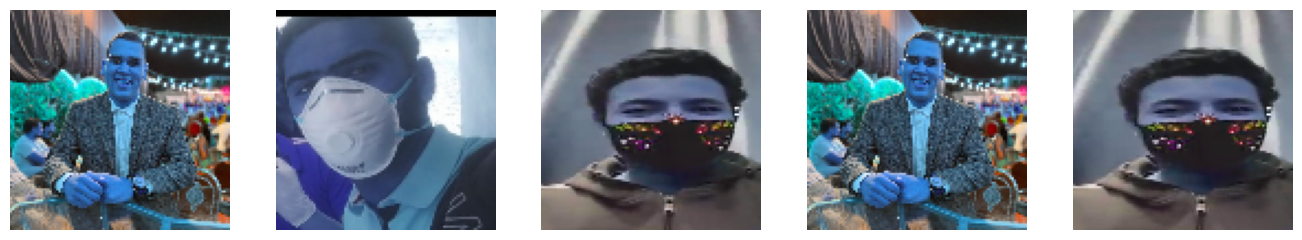

In [77]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_pred),5))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_pred[i])    
    plt.axis('off')

In [78]:
x_pred_array = np.array(x_pred)
print(f'x_pred shape  is {x_pred_array.shape}')


x_pred shape  is (3, 100, 100, 3)


In [79]:
y_result = model.predict(x_pred_array)

print('Prediction Shape is {}'.format(y_result.shape))

1/1 [==============================] - 0s 19ms/step
Prediction Shape is (3, 2)


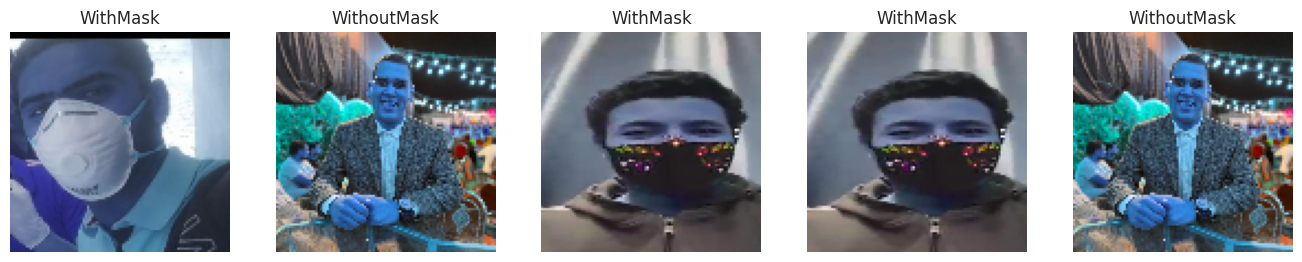

In [81]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_pred),5))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))